<a href="https://colab.research.google.com/github/Homabeyrami/ML_Project_Pra/blob/main/DS02_Session19_ANNs_Hoda_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/amir-saniyan/HodaDatasetReader.git

Cloning into 'HodaDatasetReader'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Receiving objects: 100% (24/24), 6.34 MiB | 3.17 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow.keras.backend as K
import warnings
warnings.filterwarnings('ignore')


In [4]:
from HodaDatasetReader.HodaDatasetReader import read_hoda_dataset

In [5]:
X_train, y_train = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Train 60000.cdb')
X_test, y_test = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Test 20000.cdb')


In [6]:
X_train.shape

(60000, 1024)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train

array([6., 5., 0., ..., 2., 6., 6.], dtype=float32)

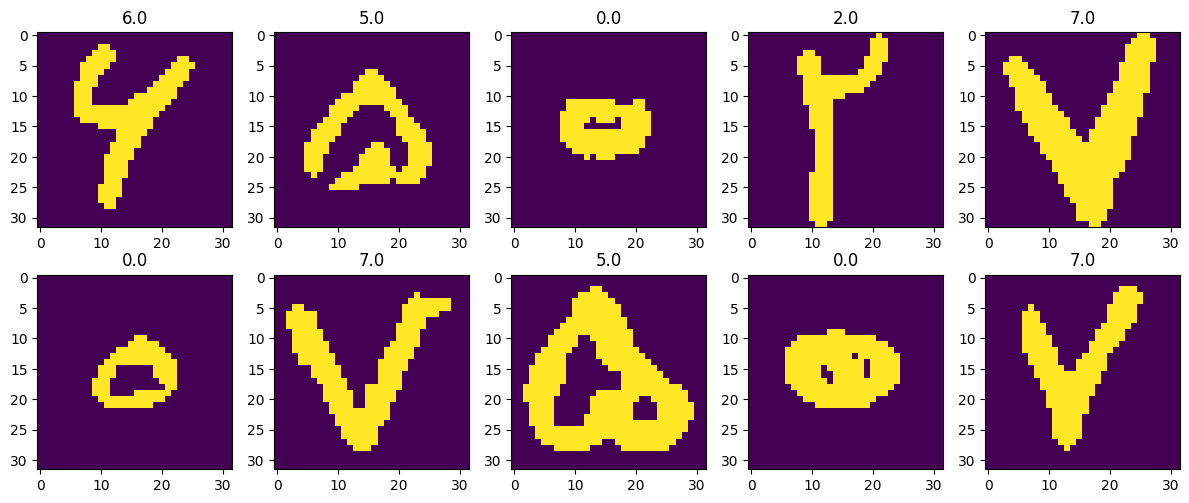

In [9]:
plt.figure(figsize=(12,5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i].reshape(32,32))
  plt.title(y_train[i])

plt.tight_layout()
plt.show()

In [10]:
##Import the libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [11]:
# Building the neural network (Here we are using 2 hidden layers and one branched layer with 10 neurons each)
##define input layer
input_layer = Input(shape=(1024,), name='input_layer')

##Defining 3 hidden layers
Layer_1 = Dense(32, activation="relu", name='Layer_1')(input_layer)
Layer_2 = Dense(64, activation="relu", name='Layer_2')(Layer_1)
Layer_3 = Dense(32, activation="relu", name='Layer_3')(Layer_2)

##Defining output layer
output = Dense(10, activation="softmax", name='output')(Layer_3)

##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output)

In [12]:
##summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1024)]            0         
                                                                 
 Layer_1 (Dense)             (None, 32)                32800     
                                                                 
 Layer_2 (Dense)             (None, 64)                2112      
                                                                 
 Layer_3 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 37322 (145.79 KB)
Trainable params: 37322 (145.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
## defining the optimiser and loss function
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import F1Score, Accuracy

adam = Adam(learning_rate=0.01, beta_1=0.91, beta_2=0.998)
scce = SparseCategoricalCrossentropy()
#metric = Accuracy()

model.compile(optimizer=adam, loss=scce, metrics=['accuracy'])

##training the model
history = model.fit(X_train, y_train, epochs=10, verbose=True,
                    batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1985 - accuracy: 0.9454 - val_loss: 0.2475 - val_accuracy: 0.9298
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1269 - accuracy: 0.9681 - val_loss: 0.2194 - val_accuracy: 0.9470
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1091 - accuracy: 0.9731 - val_loss: 0.2869 - val_accuracy: 0.9446
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0999 - accuracy: 0.9762 - val_loss: 0.2061 - val_accuracy: 0.9520
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0958 - accuracy: 0.9774 - val_loss: 0.2292 - val_accuracy: 0.9527
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0867 - accuracy: 0.9793 - val_loss: 0.2192 - val_accuracy: 0.9553
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0811 - accuracy: 0.9815 - val_loss: 0.2526 - val_accuracy:

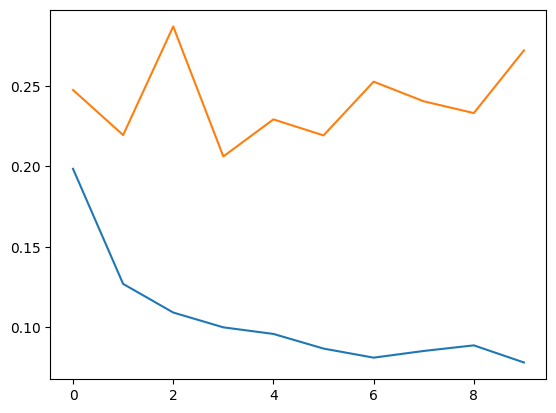

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])